In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

df = pd.read_csv('data/netflix_titles.csv', encoding="latin1")


In [ ]:
# # 1 ¿En qué año se subieron más películas a la plataforma?
df_movies = df.query('type == "Movie"').copy()

df_movies['date_added'] = pd.to_datetime(df_movies['date_added'])

df_movies['year_added'] = df_movies['date_added'].dt.year

contador_peliculas = df_movies['year_added'].value_counts().sort_index()


print(contador_peliculas.idxmax())
print(contador_peliculas.max())

2019
1424


In [ ]:
# # 2 En que país se han subido más series a netflix?

df_series = df[df["type"] =="TV Show"].copy()
# df_series = df.loc[df['type'] == 'TV Show']
# df_series = df.query("type == 'TV Show'")


top_paises = df_series["country"].value_counts().head(3)

top_paises


country
United States     760
United Kingdom    213
Japan             169
Name: count, dtype: int64

In [ ]:
# # 1 ¿Cuántos títulos hay en total en el catálogo?

print(f"total filas: {len(df)}")
print(f"total filas nulas: {df["title"].isna().sum()}")
print(f"total valores unicos: {df["title"].nunique()}")


total filas: 8809
total filas nulas: 0
total valores unicos: 8806


In [ ]:
# # 2 ¿Cuántas películas y series hay respectivamente? (con proporción)

conteo= df["type"].value_counts()
proporcion = df["type"].value_counts(normalize=True)

resultado = pd.DataFrame({"cantidad": conteo,"proporcion":proporcion})

print(resultado)

         cantidad  proporcion
type                         
Movie        6132    0.696106
TV Show      2677    0.303894


In [ ]:
# # 3 ¿Cuál es el contenido más antiguo disponible en Netflix?

df.sort_values("release_year")[["title", "type", "release_year", "country"]].head(1)

,title,type,release_year,country
4250,Pioneers: First Women Filmmakers*,TV Show,1925,NaN


In [ ]:
# # 4 ¿Cuántos títulos se añadieron en 2020?

df_movies2=df_movies.copy()
df_movies2["date_added"] = pd.to_datetime(df_movies2["date_added"])

df_movies2["date_added"] = df_movies2["date_added"].dt.year

len(df_movies2[df_movies2["date_added"]==2020])


1284

In [ ]:
# #  5 ¿Cuál es la película más larga y la serie con más temporadas?

df = df[df['duration'].notna()]
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(int)

pelicula_larga = df[df["type"] == "Movie"][["title","type","duration_num","duration"]].sort_values("duration_num",ascending=False).head(1)


series_temporadas= df[df["type"] == "TV Show"][["title","type","duration_num","duration"]].sort_values("duration_num",ascending=False).head(1)
series_temporadas,pelicula_larga

(              title     type  duration_num    duration
 548  Grey's Anatomy  TV Show            17  17 Seasons,
                            title   type  duration_num duration
 4253  Black Mirror: Bandersnatch  Movie           312  312 min)

In [ ]:
# # 6 ¿Qué porcentaje de los datos tiene valores nulos en director y cast?
(df["director"].isna() & df["cast"].isna()).mean()

np.float64(0.039972745855098794)

In [ ]:
# # 7 Normaliza la columna duration separando el número y la unidad en dos columnas.

df["duration_unit"] = df["duration"].str.extract(r"([a-zA-Z]+)")

df[["duration_unit","duration_num"]]


,duration_unit,duration_num
0,min,90
1,Seasons,2
2,Season,1
3,Season,1
4,Seasons,2
...,...,...
8804,min,88
8805,min,88
8806,min,111
8807,Season,1


In [ ]:
# # 8 Convierte date_added a datetime y extrae año y mes en columnas nuevas.
df_modify_date = df.copy()
df_modify_date["date_added"] = pd.to_datetime(df["date_added"],errors="coerce")

df_modify_date

df_modify_date["month"] = df_modify_date["date_added"].dt.month.astype("Int64")
df_modify_date["year"]=df_modify_date["date_added"].dt.year.astype("Int64")

df_modify_date[["month","year"]]

,month,year
0,9,2021
1,9,2021
2,9,2021
3,9,2021
4,9,2021
...,...,...
8804,11,2019
8805,1,2020
8806,3,2019
8807,4,2024


In [ ]:
# # 8 Elimina duplicados si existen en títulos, y justifica si debes o no hacerlo.

df[df["title"].duplicated(keep=False)].sort_values("title")

#no deben eliminarse porque son distintos directores en distintas fechas, paises,duraciones como si fueran versiones de peliculas distintas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,duration_num,duration_unit
3962,s3963,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124,min
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124,min
4522,s4523,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Ãigarden, Jonas Str...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,min
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Ãigarden, Jonas Str...","Norway, Iceland, United States","October 10, 2018",2018,R,144 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,min
3996,s3997,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Season
5964,s5965,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Season


In [ ]:
# # 9 ¿Cuáles son los 5 países con más títulos disponibles?

# # df_movies["country"].value_counts("title").sort_values(ascending=False).head(5)

df_sin_nan_country = df.dropna(subset="country")
df_sin_nan_country["country"] = df_sin_nan_country["country"].str.split(",")
df_exploded = df_sin_nan_country.explode("country")

df_exploded["country"]= df_exploded["country"].str.strip()

df_exploded["country"].value_counts().head(5)




C:\Users\diego\AppData\Local\Temp\ipykernel_6604\3669791881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nan_country["country"] = df_sin_nan_country["country"].str.split(",")


country
United States     3691
India             1046
United Kingdom     806
Canada             445
France             393
Name: count, dtype: int64

In [ ]:
# # 10 ¿Cuál es la distribución de contenido por clasificación (rating) para películas?

df[df["type"] == "Movie"]["rating"].value_counts(normalize=True)


rating
TV-MA       0.336378
TV-14       0.232790
R           0.130016
TV-PG       0.088091
PG-13       0.079935
PG          0.046819
TV-Y7       0.022675
TV-Y        0.021370
TV-G        0.020555
NR          0.012235
G           0.006688
TV-Y7-FV    0.000816
NC-17       0.000489
UR          0.000489
66 min      0.000163
84 min      0.000163
74 min      0.000163
A           0.000163
Name: proportion, dtype: float64

In [ ]:
# # 11 ¿Qué directores tienen más de 10 títulos en la plataforma?

contar_directores= df["director"].dropna().value_counts()
directores_top_10 = contar_directores[contar_directores > 10]

directores_top_10
# df["director"].value_counts()[df["director"].value_counts() > 10]

director
Rajiv Chilaka              19
RaÃºl Campos, Jan Suter    18
Suhas Kadav                16
Marcus Raboy               16
Jay Karas                  14
Cathy Garcia-Molina        13
Jay Chapman                12
Youssef Chahine            12
Martin Scorsese            12
Steven Spielberg           11
Name: count, dtype: int64

In [ ]:
# # 12 ¿Cuál fue el año con más contenido añadido a la plataforma? ¿Qué tipo predominaba ese año?

df_anho = df.copy()

df_anho["date_added"] = pd.to_datetime(df_anho["date_added"],errors="coerce")

df_anho["ano"] = df_anho["date_added"].dt.year

df_anho["ano"] = df_anho["ano"].astype("Int64")

anho_mas_contenido = df_anho["ano"].value_counts().head(1)

anho_top = anho_mas_contenido.index[0]

df_anho_top = df_anho[df_anho["ano"] == anho_top]

df_anho_top["type"].value_counts()

# df_anho[anho_mas_contenido.index[0]]["type"].value_counts()



type
Movie      1424
TV Show     575
Name: count, dtype: int64

In [ ]:
# # 12 ¿Qué géneros son más comunes? (listed_in puede tener múltiples valores)

df_generos = df.copy()

df_generos["listed_in"] = df_generos["listed_in"].str.split(",")

df_generos_explode = df_generos.explode("listed_in")

df_generos_explode= df_generos_explode.dropna(subset="listed_in")

df_generos_explode["listed_in"].value_counts().head(3)


listed_in
 International Movies    2624
Dramas                   1600
Comedies                 1210
Name: count, dtype: int64

In [ ]:
# # 13 ¿Qué país tiene mayor proporción de series respecto a películas?

df_sin_na = df.copy()

df_sin_na = df_sin_na.dropna(subset="country")

df_sin_na["country"] = df_sin_na["country"].str.split(",")
df_sin_na_explode = df_sin_na.explode("country")

df_sin_na_explode["country"] = df_sin_na_explode["country"].str.strip()

tabla_proporcion = df_sin_na_explode.groupby(["country","type"]).size().unstack(fill_value=0)

tabla_proporcion["proporcion_series"] = tabla_proporcion["TV Show"] / (tabla_proporcion["Movie"]+tabla_proporcion["TV Show"])

tabla_proporcion.sort_values("proporcion_series",ascending=False).head(5)

type,Movie,TV Show,proporcion_series
country,,,
Azerbaijan,0,1,1.0
Belarus,0,1,1.0
Cuba,0,1,1.0
Cyprus,0,1,1.0
Puerto Rico,0,1,1.0


In [ ]:
# # 14 ¿Qué género es más común en películas frente a series?

df_genero = df.copy()

df_genero= df_genero.dropna(subset="listed_in")


df_genero["listed_in"] = df_genero["listed_in"].str.split(",")
df_genero_explode = df_genero.explode("listed_in")

df_genero_explode["listed_in"] = df_genero_explode["listed_in"].str.strip()

genero_mas_comun_peliculas =df_genero_explode[df_genero_explode["type"] == "Movie"] \
    .groupby("listed_in").size().sort_values(ascending=False).head(1)

genero_mas_comun_series = df_genero_explode[df_genero_explode["type"] == "TV Show"] \
    .groupby("listed_in").size().sort_values(ascending=False).head(1)

print("Género más común en películas:")
print(genero_mas_comun_peliculas)

print("\nGénero más común en series:")
print(genero_mas_comun_series)

Género más común en películas:
listed_in
International Movies    2752
dtype: int64

Género más común en series:
listed_in
International TV Shows    1351
dtype: int64


Text(0, 0.5, 'Cantidad de títulos')

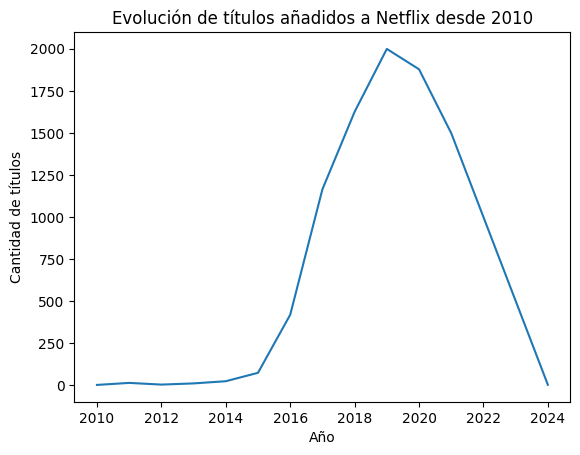

In [ ]:
# # 15 ¿Ha cambiado la cantidad de títulos añadidos año a año desde 2010? (gráfico de líneas)

df_anho = df.copy()

df_anho["date_added"] = pd.to_datetime(df_anho["date_added"],errors="coerce")

df_anho["anho"] = df_anho["date_added"].dt.year.astype("Int64")

df_progresion_titulos = df_anho[df_anho["anho"]>=2010].groupby("anho").size().reset_index(name="cantidad")

df_progresion_titulos

sbn.lineplot(data=df_progresion_titulos,x = "anho",y="cantidad")
plt.title("Evolución de títulos añadidos a Netflix desde 2010")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos")



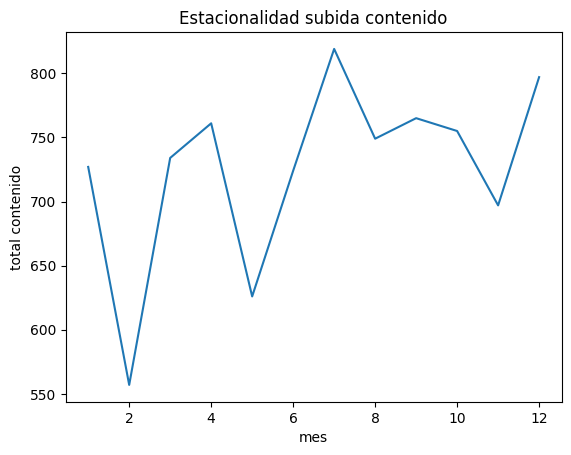

In [ ]:
# # 16 ¿Hay alguna estacionalidad? ¿En qué mes se suele subir más contenido?

df_anho["month"] = df_anho["date_added"].dt.month.astype("Int64")

df_estacionalidad =df_anho["month"].value_counts(ascending=False).reset_index(name="total_content")

df_estacionalidad
sbn.lineplot(data=df_estacionalidad,x="month",y="total_content")
plt.title("Estacionalidad subida contenido")
plt.xlabel("mes")
plt.ylabel("total contenido")
plt.show()




In [228]:
# 17 ¿Cuál es la duración promedio de películas por país?

df_pais= df.copy()
df_pais["country"] = df_pais["country"].str.split(",")
df_pais_exploded = df_pais.explode("country")
df_pais_exploded["country"] = df_pais_exploded["country"].str.strip()
df_pais_exploded = df_pais_exploded.dropna(subset="country")
df_pais_exploded["num_duration"] = df_pais_exploded["duration"].str.extract(r"([0-9]+)").astype("Int64")
df_pais_exploded[df_pais_exploded["type"]=="Movie"].groupby("country")["num_duration"].mean().reset_index(name = "duracion_media")




,country,duracion_media
0,,81.166667
1,Afghanistan,84.0
2,Albania,105.0
3,Algeria,108.333333
4,Angola,107.0
...,...,...
113,Vatican City,96.0
114,Venezuela,96.25
115,Vietnam,106.285714
116,West Germany,113.333333
